In [1]:
import pandas as pd
english = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english_lemmatized.csv")

In [2]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

experiment_fs = LyricsClassificationExperiment(
    corpus=english,
    genrecol="cat12",
    lyricscol="full_lyrics",
    artistcol="track.s.firstartist.name",
    random_state=42,
    subsample_debug=0.2, 
    output_dir="data/experiment_outputs/FS_Extractor_Test",
)
experiment_fs.compute_fs_ngram_features()

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


Artist split validated: 3116 train, 780 test (disjoint)
Loaded vocabulary and vectorizer from checkpoint: 4526c0bd...
FSExtractor configured: FS N-grams (pipeline, top 100/genre, min 20 artists, with unigrams, stopwords filtered)


In [3]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

experiment = LyricsClassificationExperiment(
    corpus=english,
    genrecol="cat12",
    lyricscol="lyrics_lemmatized",
    artistcol="track.s.firstartist.name",
    random_state=42,
    subsample_debug=0.2,
    output_dir="data/experiment_outputs/Monroe_Extractor_Test",
)
experiment.compute_monroe_ngram_features(
    use_stopword_filter=True,
    use_bigram_boundary_filter=True,
    include_unigrams=True,
    prior_concentration=1.0,
    p_value=0.001,
)

Artist split validated: 3116 train, 780 test (disjoint)
Loaded z-scores from checkpoint: e1205c2a...
Selected vocabulary size: 5,278 n-grams (BH FDR=0.001)
MonroeExtractor configured: Monroe N-grams (min 20 artists, with unigrams, stopwords filtered, p=0.001 (FDR correction), prior_concentration=1.0)


In [4]:
experiment.compute_stm_topic_features(k_range=(2, 3))

Aggregating track-level DTM to artist-level...
Artist-level DTM: 3116 artists, 5278 features
Initializing STM topic modeler...
Tuning and fitting STM model...
Converting data to STM format...
Tuning number of topics (K range: (2, 3))...
Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..
	 Recovering initialization...
 	....................................................
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.247) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.242, relative change = 6.425e-04) 
....................................................................................................
Compl

In [5]:
experiment.extractor.z_scores_df_.query("passes_bh and z_score > 0").groupby("genre").size()

genre
alternative rock     308
electronic           488
hard rock            244
heavy metal          745
hip hop             1263
indie rock           279
jazz                 344
metal               1415
pop                  477
pop rock             258
rock                 322
dtype: int64

array([[<Axes: title={'center': 'alternative rock'}>,
        <Axes: title={'center': 'electronic'}>,
        <Axes: title={'center': 'hard rock'}>],
       [<Axes: title={'center': 'heavy metal'}>,
        <Axes: title={'center': 'hip hop'}>,
        <Axes: title={'center': 'indie rock'}>],
       [<Axes: title={'center': 'jazz'}>,
        <Axes: title={'center': 'metal'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'pop rock'}>,
        <Axes: title={'center': 'rock'}>, <Axes: >]], dtype=object)

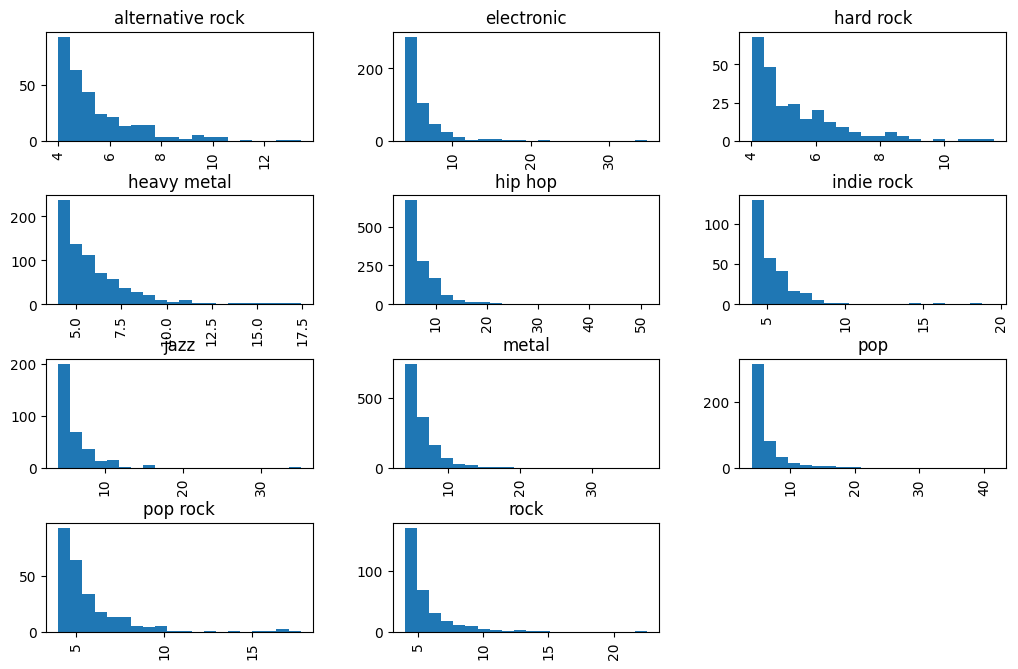

In [6]:
experiment.extractor.z_scores_df_.query("passes_bh and z_score > 0")["z_score"].hist(by=experiment.extractor.z_scores_df_["genre"], bins=20, figsize=(12, 8))

In [7]:
experiment_fs.train_fixed_parametrer_logistic_regression()
experiment_fs.show_random_baseline_evaluation()
experiment_fs.show_model_evaluation()
experiment_fs.show_top_coefficients_per_genre()

Training pipeline with fixed parameters...
F1 macro: 0.088
Precision macro: 0.088
Recall macro: 0.089
Cohen's kappa: -0.004
Selected model parameters:
  C: 1.0
  l1_ratio: 0.5
F1 macro: 0.200
Precision macro: 0.214
Recall macro: 0.245
Cohen's kappa: 0.150
                  precision    recall  f1-score   support

alternative rock       0.07      0.15      0.09       171
      electronic       0.17      0.14      0.15       421
       hard rock       0.03      0.11      0.04        88
     heavy metal       0.18      0.37      0.24       180
         hip hop       0.55      0.70      0.61       327
      indie rock       0.05      0.16      0.07       108
            jazz       0.05      0.21      0.09        78
           metal       0.34      0.43      0.38       375
             pop       0.41      0.20      0.27       947
        pop rock       0.02      0.08      0.03        73
            rock       0.49      0.13      0.21      1409

        accuracy                           0.2

In [8]:
experiment.train_fixed_parametrer_logistic_regression()
experiment.show_random_baseline_evaluation()
experiment.show_model_evaluation()
experiment.show_top_coefficients_per_genre()

Training pipeline with fixed parameters...
F1 macro: 0.088
Precision macro: 0.088
Recall macro: 0.089
Cohen's kappa: -0.004
Selected model parameters:
  C: 1.0
  l1_ratio: 0.5
F1 macro: 0.226
Precision macro: 0.226
Recall macro: 0.230
Cohen's kappa: 0.185
                  precision    recall  f1-score   support

alternative rock       0.08      0.10      0.09       171
      electronic       0.15      0.15      0.15       421
       hard rock       0.04      0.07      0.05        88
     heavy metal       0.17      0.24      0.20       180
         hip hop       0.69      0.62      0.66       327
      indie rock       0.08      0.10      0.09       108
            jazz       0.10      0.09      0.09        78
           metal       0.34      0.38      0.36       375
             pop       0.38      0.38      0.38       947
        pop rock       0.03      0.01      0.02        73
            rock       0.44      0.38      0.41      1409

        accuracy                           0.3

## RQ2

In [ ]:
experiment.compute_stm_topic_features(k_range=(2, 20))

In [ ]:
experiment.train_fixed_parametrer_logistic_regression()
experiment.show_random_baseline_evaluation()
experiment.show_model_evaluation()
experiment.show_top_coefficients_per_genre()